In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection  import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score



### Область работы 2 (поиск  модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train_house_B.csv'# содержит только имя файла, без имен папок !!!

In [5]:
data = pd.read_csv(path_train)
data = data.drop_duplicates()
data = data.reset_index(drop=True)
data


,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,2604000,1.222962,0.047686,-1.033389,-2.465344,0.831065,0.802990,1.590989,0.727946,0.893957,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063,1.307431
1,4900000,-0.091662,-0.356325,-0.486840,-2.465344,-0.126718,-0.024866,-0.323972,1.658337,1.751428,...,-0.141322,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618,-0.478408
2,4480000,1.222962,-1.064819,0.338749,0.405623,-0.854973,-0.654330,0.525426,0.585866,-1.661101,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618,1.307431
3,3234000,1.222962,-1.570692,-0.696696,0.405623,-0.670784,-0.024866,0.557116,-1.280083,1.273040,...,-0.141322,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063,-0.478408
4,3780000,-1.406286,-1.563680,-1.058295,0.405623,-0.126718,-0.879174,-1.649281,0.496669,0.255596,...,-0.141322,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063,-0.478408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,3360000,-0.091662,0.593876,-0.087882,-2.465344,0.077307,0.151482,1.452151,1.772175,-1.264971,...,-0.141322,-0.554035,1.403419,-0.570187,0.454355,-0.805741,1.378217,1.200306,-0.679063,1.307431
404,5950000,-1.406286,0.179794,0.640850,0.405623,-0.126718,-0.975186,-1.028510,0.203867,-1.190658,...,-0.141322,1.804941,0.047278,-0.570187,-1.037904,1.517692,-0.929397,0.960546,-0.679063,-0.478408
405,3675000,-0.091662,1.099966,0.225750,-2.465344,-0.716123,-0.534316,-0.090348,1.151380,1.631097,...,-0.141322,-0.554035,-1.308863,-0.570187,0.477182,-0.805741,-0.929397,-1.512245,-0.679063,1.307431
406,7455000,1.222962,1.498909,-0.392289,0.405623,-0.126718,-0.024866,1.484438,-1.233671,-0.469048,...,-0.141322,-0.554035,0.047278,1.421812,0.407275,0.355976,0.224410,-1.477806,-0.679063,-0.478408


array([[<Axes: title={'center': 'price'}>, <Axes: title={'center': '0'}>,
        <Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>,
        <Axes: title={'center': '11'}>, <Axes: title={'center': '12'}>,
        <Axes: title={'center': '13'}>],
       [<Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>,
        <Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
        <Axes: title={'center': '18'}>],
       [<Axes: title={'center': '19'}>, <Axes: title={'center': '20'}>,
        <Axes: title={'center': '21'}>, <Axes: title={'center': '22'}>,
        <Axes: title={'center': '23'}>],
       [<Axes: title={'center': '24'}>, <Axes: title={'center': '25'}>,
        <A

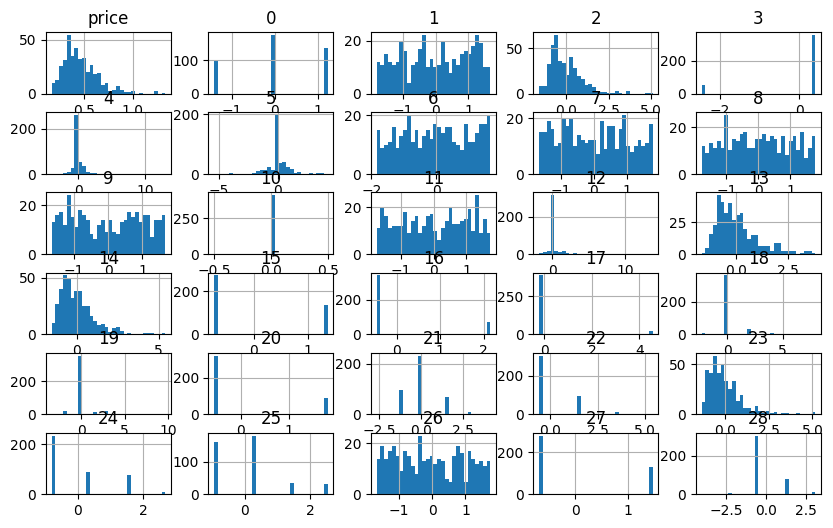

In [6]:
data.hist(figsize=(10, 6), bins= 30)

In [7]:
X = data.drop(columns=['price'])
y = data['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
data.isna().sum()

price    0
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
dtype: int64

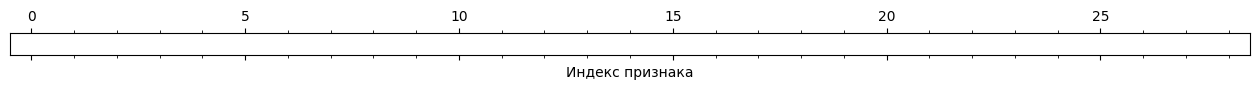

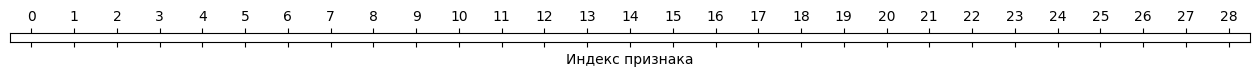

In [10]:
from sklearn.feature_selection  import RFE
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=0, test_size=.5)

rfe_select = RFE(RandomForestRegressor(n_estimators=100, random_state=42),
             n_features_to_select=40)

rfe_select.fit(X_train, y_train)


# визуализируем отобранные признаки:
mask = rfe_select.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

mask = rfe_select.get_support()[:30]
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
plt.yticks([])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

In [11]:
select_pct = SelectPercentile(percentile=50)
select_pct.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select_pct.transform(X_train)


/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


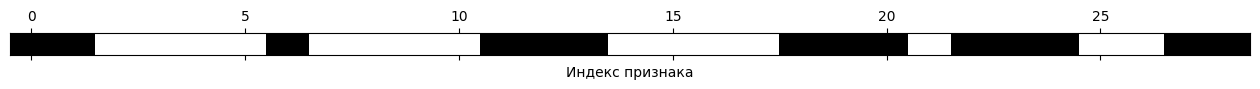

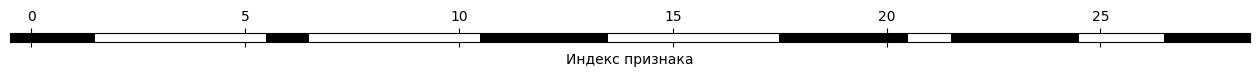

In [12]:
mask = select_pct.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака");

mask = select_pct.get_support()[:30]
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
plt.yticks([])
plt.xlabel("Индекс признака");

In [13]:
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('estimator',      RandomForestRegressor())])

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling,
     'estimator__max_features': ['sqrt', 'log2', 'None']}
]

grid = GridSearchCV(pipe, param_grid, cv = cv, scoring='neg_mean_absolute_percentage_error')
grid.fit(X_train, y_train)

grid 

        


/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py", line 427, in fit
    self._final_est

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('estimator', RandomForestRegressor())]),
             param_grid=[{'estimator__max_features': ['sqrt', 'log2', 'None'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             scoring='neg_mean_absolute_percentage_error')

In [14]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,6,4,1,5,0,2,7,3,8,9,10,11
mean_fit_time,0.155192,0.154072,0.162672,0.149429,0.15854,0.170284,0.156656,0.16719,0.003645,0.003634,0.007782,0.003703
std_fit_time,0.00348,0.007059,0.005782,0.000975,0.008625,0.017135,0.00021,0.005489,0.000186,0.000037,0.000123,0.000131
mean_score_time,0.011906,0.012123,0.012481,0.012124,0.012515,0.012265,0.012388,0.01243,0.0,0.0,0.0,0.0
std_score_time,0.000153,0.000327,0.00031,0.000329,0.000195,0.000343,0.000279,0.00034,0.0,0.0,0.0,0.0
param_estimator__max_features,log2,log2,sqrt,log2,sqrt,sqrt,log2,sqrt,None,None,None,None
param_preprocessing,RobustScaler(),MinMaxScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),RobustScaler(),Normalizer(),Normalizer(),MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'estimator__max_features': 'log2', 'preproces...","{'estimator__max_features': 'log2', 'preproces...","{'estimator__max_features': 'sqrt', 'preproces...","{'estimator__max_features': 'log2', 'preproces...","{'estimator__max_features': 'sqrt', 'preproces...","{'estimator__max_features': 'sqrt', 'preproces...","{'estimator__max_features': 'log2', 'preproces...","{'estimator__max_features': 'sqrt', 'preproces...","{'estimator__max_features': 'None', 'preproces...","{'estimator__max_features': 'None', 'preproces...","{'estimator__max_features': 'None', 'preproces...","{'estimator__max_features': 'None', 'preproces..."
split0_test_score,-0.186731,-0.18188,-0.192049,-0.183877,-0.18581,-0.197888,-0.198285,-0.212892,NaN,NaN,NaN,NaN
split1_test_score,-0.169162,-0.166222,-0.178577,-0.17044,-0.177259,-0.171392,-0.193739,-0.190732,NaN,NaN,NaN,NaN
split2_test_score,-0.203997,-0.214392,-0.222201,-0.215068,-0.220039,-0.214156,-0.194631,-0.188779,NaN,NaN,NaN,NaN


In [15]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('estimator',  RandomForestRegressor(n_estimators=900, max_features='log2',  min_samples_leaf=1))])
pipe.fit(X_train_selected, y_train)

Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('estimator',
                 RandomForestRegressor(max_features='log2', n_estimators=900))])

In [16]:
cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_absolute_percentage_error').mean()

-0.19722173520588754

In [17]:
data_test = pd.read_csv('test_house_B.csv')

In [18]:
y_pred_test = pipe.predict(data_test)

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


ValueError: X has 29 features, but MinMaxScaler is expecting 14 features as input.